In [316]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, ExtraTreesRegressor 
# Support vector regressor
from sklearn.svm import SVR 
from xgboost.sklearn import XGBRegressor

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.utils import resample

from scipy import stats
from scipy.stats import zscore


In [317]:
import warnings 
warnings.filterwarnings("ignore")

In [318]:
plt.style.use('fivethirtyeight')

# %config InlineBackend.figure_format = ‘retina’

In [319]:
pd.set_option('display.max_columns', None) 

In [320]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [321]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [322]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [323]:
test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [324]:
train.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [325]:
test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [326]:
test.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [327]:
train['source'] = 'train'
test['source'] = 'test'

df = pd.concat([train, test], ignore_index=True)

In [328]:
df.isnull().sum()

item_identifier                 0
item_weight                  2439
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  4016
outlet_location_type            0
outlet_type                     0
item_outlet_sales            5681
source                          0
dtype: int64

In [329]:
df.shape 

(14204, 13)

In [330]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
item_visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
item_mrp,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
outlet_establishment_year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
item_outlet_sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [331]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
source                        object
dtype: object

In [332]:
len(df.select_dtypes([np.number]).columns)

5

In [333]:
numeric_cols = df.select_dtypes([np.number]).columns

In [334]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

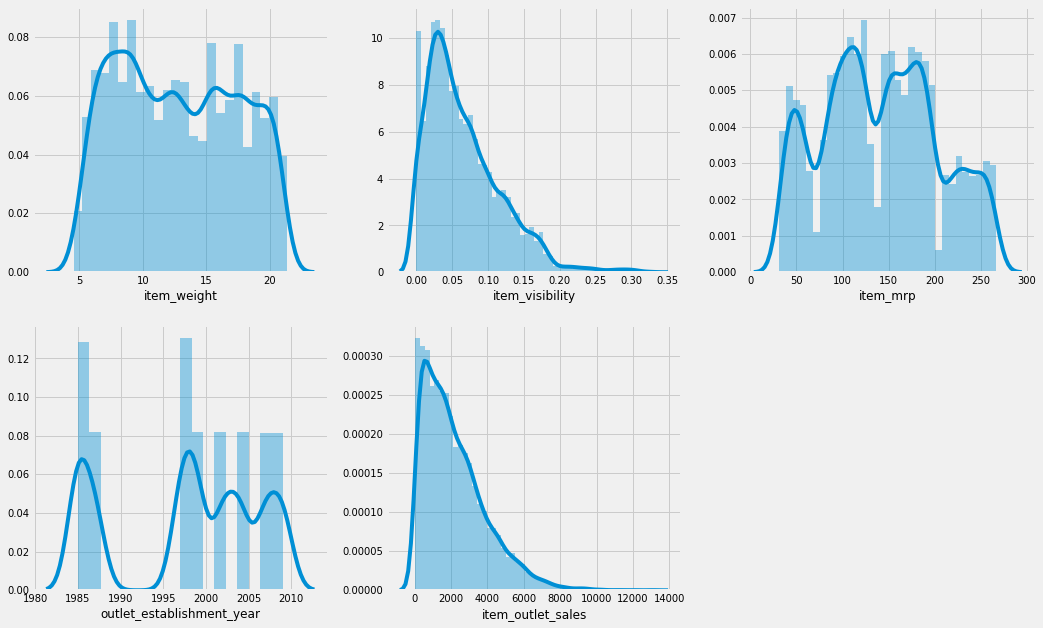

In [335]:
fig_dist, ax_dist = plt.subplots(2, 3, figsize=(16,10))
sns.distplot(df[numeric_cols[0]], ax=ax_dist[0][0])
sns.distplot(df[numeric_cols[1]], ax=ax_dist[0][1])
sns.distplot(df[numeric_cols[2]], ax=ax_dist[0][2])
sns.distplot(df[numeric_cols[3]], ax=ax_dist[1][0])
sns.distplot(df[numeric_cols[4]], ax=ax_dist[1][1])
fig_dist.delaxes(ax_dist[1][2])

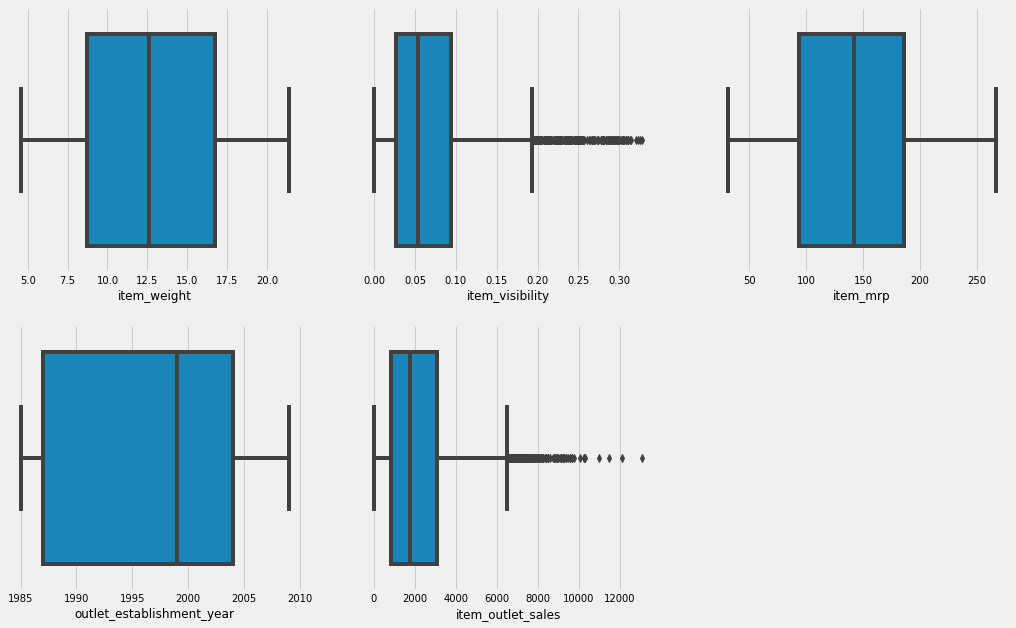

In [336]:
fig_box, ax_box = plt.subplots(2, 3, figsize=(16,10))
sns.boxplot(df[numeric_cols[0]].dropna(), ax=ax_box[0][0])
sns.boxplot(df[numeric_cols[1]].dropna(), ax=ax_box[0][1])
sns.boxplot(df[numeric_cols[2]].dropna(), ax=ax_box[0][2])
sns.boxplot(df[numeric_cols[3]].dropna(), ax=ax_box[1][0])
sns.boxplot(df[numeric_cols[4]].dropna(), ax=ax_box[1][1])
fig_box.delaxes(ax_box[1][2])

<Figure size 1152x1152 with 0 Axes>

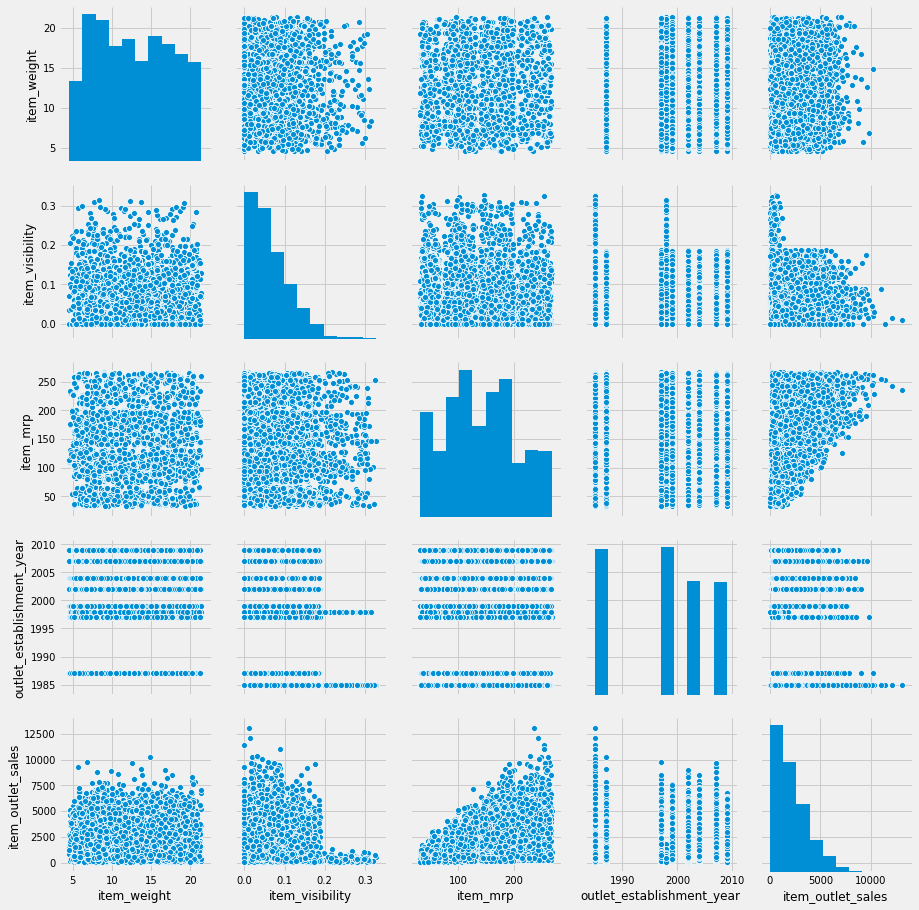

In [337]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

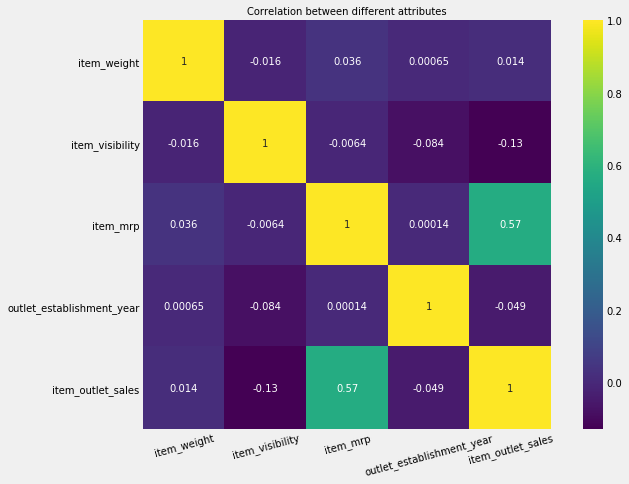

In [338]:
plt.figure(figsize=(10,7))
plt.rc('xtick', labelsize=SMALL_SIZE)   
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.xticks(rotation=15)
plt.show()

In [339]:
non_numeric_cols = df.select_dtypes([np.object]).columns

In [340]:
non_numeric_cols

Index(['item_identifier', 'item_fat_content', 'item_type', 'outlet_identifier',
       'outlet_size', 'outlet_location_type', 'outlet_type', 'source'],
      dtype='object')

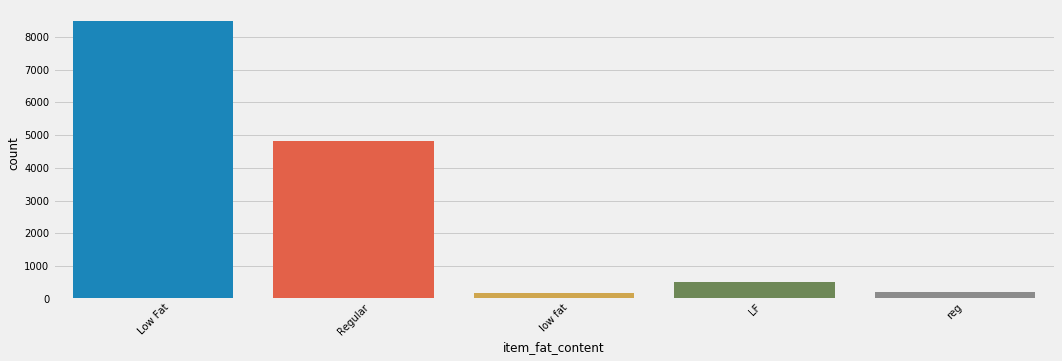

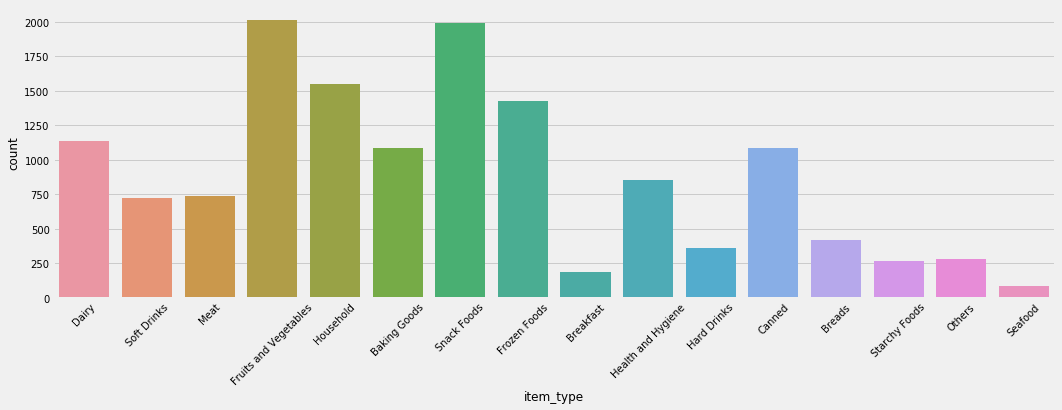

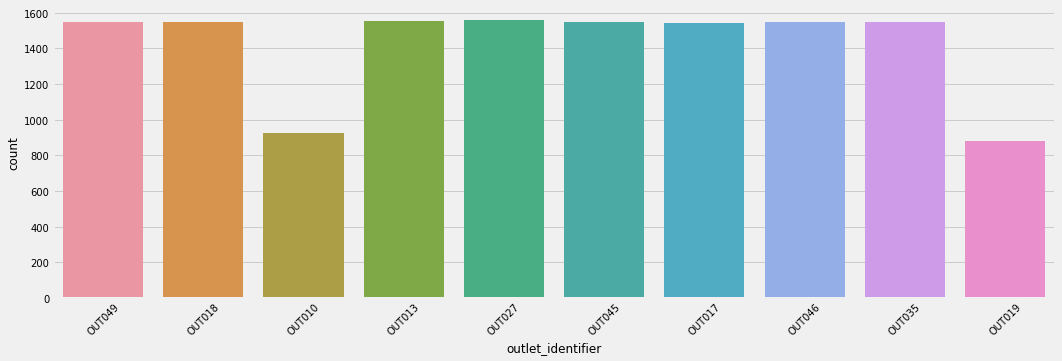

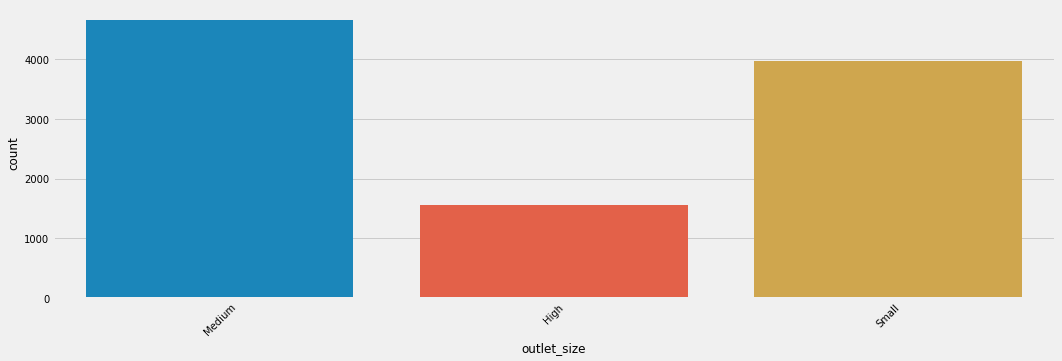

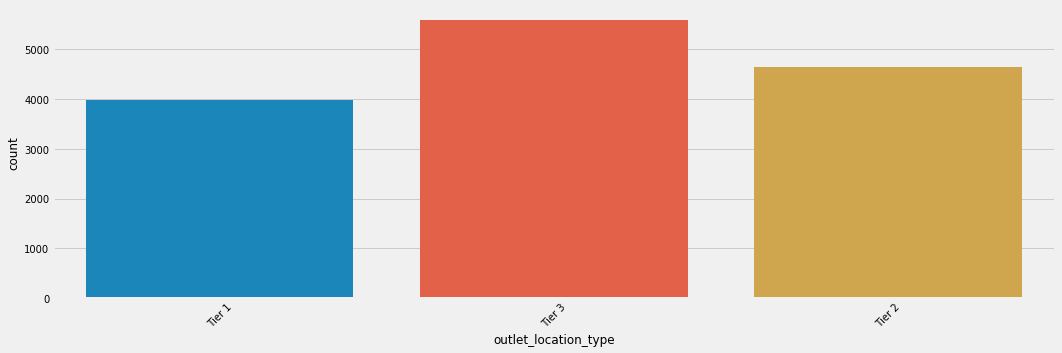

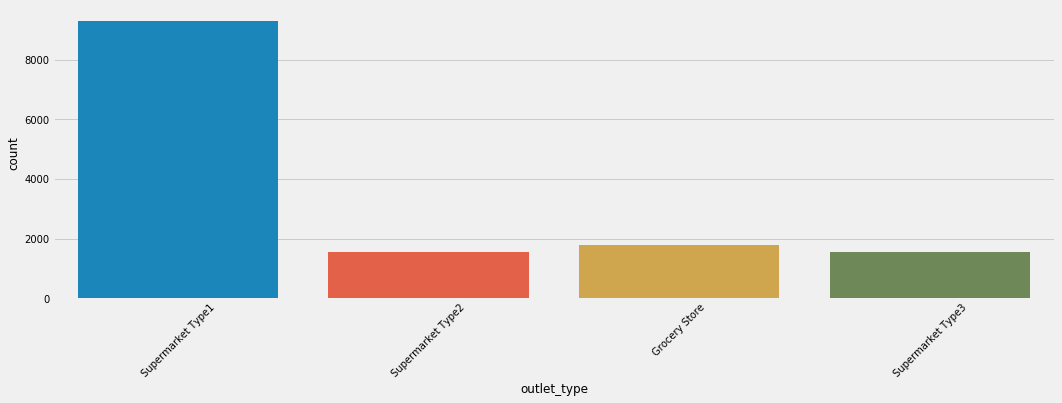

In [341]:
for col in non_numeric_cols[1:-1]:  
    plt.figure(figsize=(16, 5))
    sns.countplot(df[col])
    plt.xticks(rotation=45)

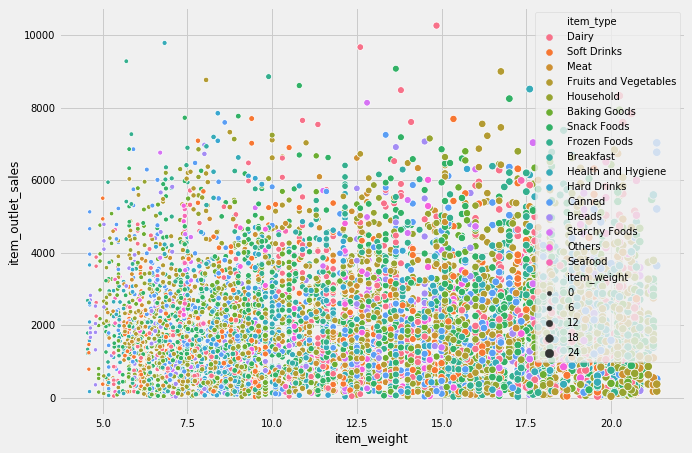

In [342]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='item_weight',
    y='item_outlet_sales',
    hue='item_type',
    style=None,
    size='item_weight',
    data=df,
    )

Text(0, 0.5, 'Outlet Sales')

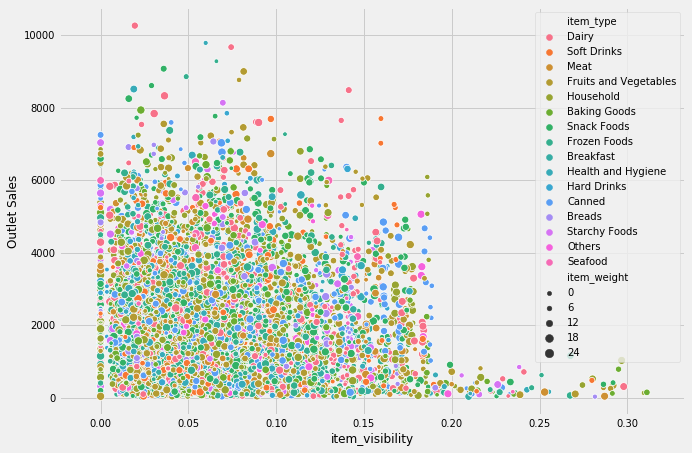

In [343]:
plt.figure(figsize=(10,7))

sns.scatterplot(x='item_visibility',
    y='item_outlet_sales',
    hue='item_type',
    style=None,
    size='item_weight',
    data=df,
    )
plt.ylabel('Outlet Sales') # overriding the y axis label name

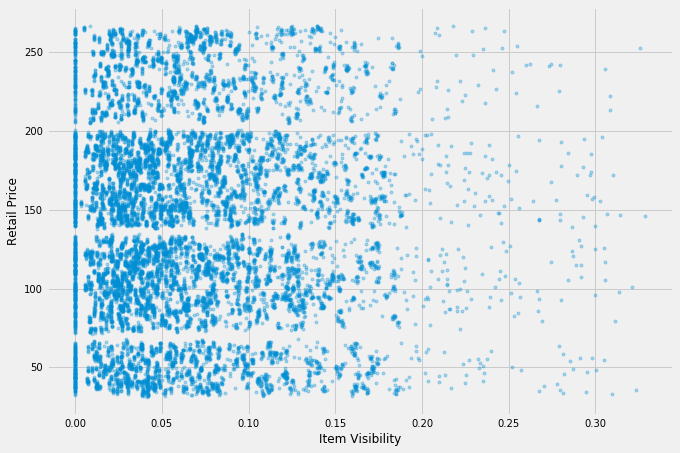

In [344]:
plt.figure(figsize=(10,7))
plt.xlabel('Item Visibility')
plt.ylabel('Retail Price')
plt.plot(df['item_visibility'], df['item_mrp'], '.', alpha=0.3)

Text(0, 0.5, 'Outlet Sales')

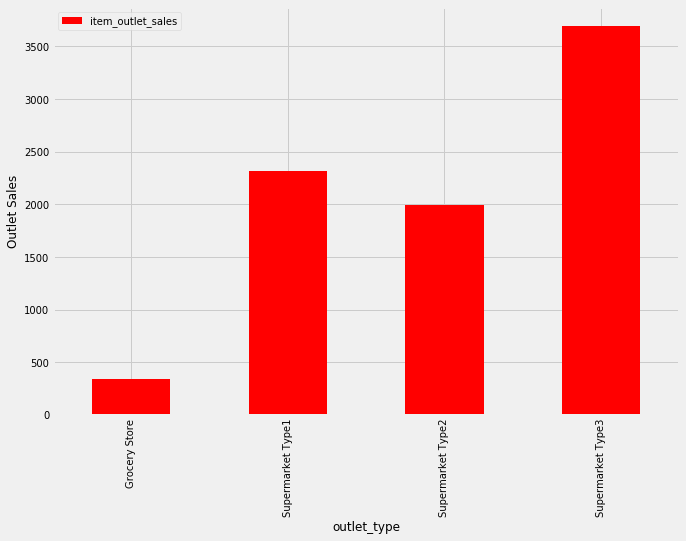

In [345]:
outlet_type_table = pd.pivot_table(df, values='item_outlet_sales',
    index='outlet_type',
    aggfunc='mean',)
outlet_type_table.plot(kind='bar', color='red', figsize=(10,7))
plt.ylabel('Outlet Sales')

Text(0, 0.5, 'Outlet Sales')

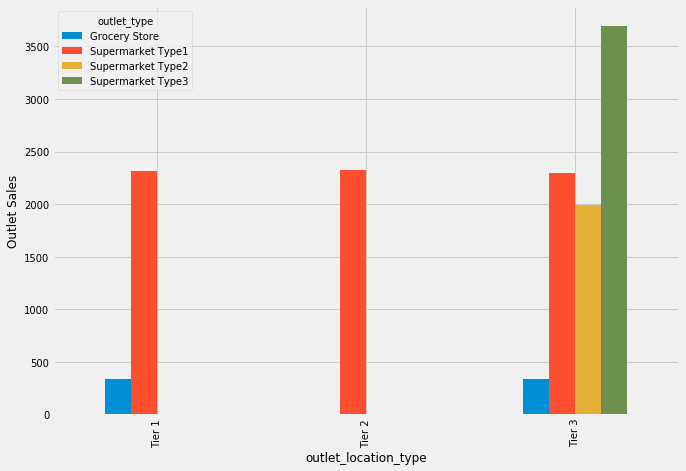

In [346]:
location_pivot_table = pd.pivot_table(df, index='outlet_location_type', 
                                      columns='outlet_type', values='item_outlet_sales', aggfunc='mean')
location_pivot_table.plot(kind='bar', figsize=(10,7))
plt.ylabel('Outlet Sales')

In [347]:
df['item_fat_content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: item_fat_content, dtype: int64

In [348]:
df['item_fat_content'] = df['item_fat_content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [349]:
df['item_fat_content'].value_counts()

Low Fat    9185
Regular    5019
Name: item_fat_content, dtype: int64

Text(0, 0.5, 'Outlet Sales')

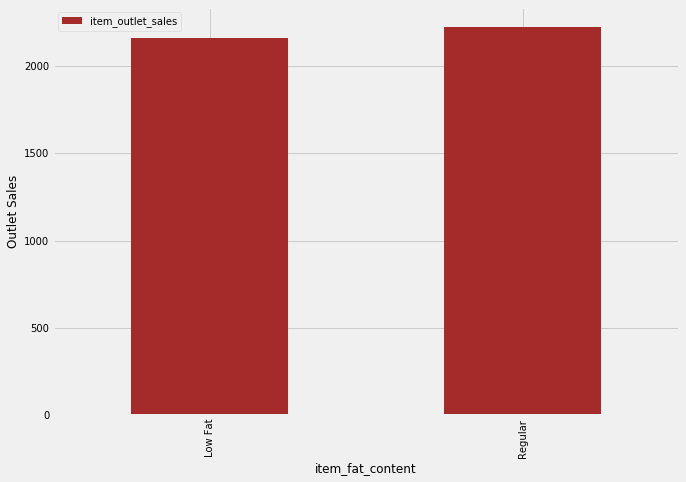

In [350]:
fat_content_table = pd.pivot_table(df, index='item_fat_content', values='item_outlet_sales', 
                                  aggfunc='mean')
fat_content_table.plot(kind='bar', color='brown', figsize=(10,7))
plt.ylabel('Outlet Sales')

In [351]:
df.dtypes 

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
source                        object
dtype: object

In [352]:
df.isnull().sum()

item_identifier                 0
item_weight                  2439
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  4016
outlet_location_type            0
outlet_type                     0
item_outlet_sales            5681
source                          0
dtype: int64

In [353]:
df['item_weight'].fillna(df['item_weight'].mean(), inplace=True)

In [354]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  4016
outlet_location_type            0
outlet_type                     0
item_outlet_sales            5681
source                          0
dtype: int64

In [355]:
df['outlet_size'].fillna('Medium', inplace=True)

In [356]:
df['outlet_size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: outlet_size, dtype: int64

In [357]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                     0
outlet_location_type            0
outlet_type                     0
item_outlet_sales            5681
source                          0
dtype: int64

In [358]:
df[df['item_visibility']==0]['item_visibility'].count()

879

In [359]:
df['item_visibility'].fillna(df['item_visibility'].median(), inplace=True)

In [360]:
df['outlet_years'] = 2010 - df['outlet_establishment_year']

In [361]:
df['outlet_years'].describe() 

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: outlet_years, dtype: float64

In [362]:
df['new_item_type'] = df['item_identifier'].apply(lambda x: x[0:2]) # labeling item type to food, drink and non consumable type

In [363]:
df['new_item_type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: new_item_type, Length: 14204, dtype: object

In [364]:
df['new_item_type'] = df['new_item_type'].map({'FD':'Food', 'DR':'Drink', 'NC':'Non-consumable'})

In [365]:
df['new_item_type'].value_counts() 

Food              10201
Non-consumable     2686
Drink              1317
Name: new_item_type, dtype: int64

In [366]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,outlet_years,new_item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,11,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,1,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,11,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,12,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,23,Non-consumable


In [367]:
df.loc[df['new_item_type']=='Non-consumable', 'item_fat_content'] = 'Non-edible'

In [368]:
df['item_fat_content'].value_counts()

Low Fat       6499
Regular       5019
Non-edible    2686
Name: item_fat_content, dtype: int64

In [369]:
item_visibility_avg = df.pivot_table(values='item_visibility', index='item_identifier', aggfunc='mean')

In [370]:
item_visibility_avg

,item_visibility
item_identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [371]:
func = lambda x: x['item_visibility']/item_visibility_avg['item_visibility'][item_visibility_avg.index==x['item_identifier']][0]

df['item_visibility_avg'] = df.apply(func, axis=1).astype(float)

In [372]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,outlet_years,new_item_type,item_visibility_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,11,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,1,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,11,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,12,Food,0.000000
4,NCD19,8.93,Non-edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,23,Non-consumable,0.000000


In [373]:
df['outlet'] = LabelEncoder().fit_transform(df['outlet_identifier'])

In [374]:
df.dtypes 

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
source                        object
outlet_years                   int64
new_item_type                 object
item_visibility_avg          float64
outlet                         int32
dtype: object

In [375]:
cols = ['outlet_identifier', 'item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type', 'new_item_type']

for col in cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [376]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,outlet_years,new_item_type,item_visibility_avg,outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,11,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,1,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,11,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,12,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,train,23,2,0.000000,1


In [377]:
df = pd.get_dummies(df, columns=['outlet_identifier', 'item_fat_content', 
                                 'outlet_size', 'outlet_location_type', 'outlet_type', 'new_item_type'])

In [378]:
df.head()

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_outlet_sales,source,outlet_years,item_visibility_avg,outlet,outlet_identifier_0,outlet_identifier_1,outlet_identifier_2,outlet_identifier_3,outlet_identifier_4,outlet_identifier_5,outlet_identifier_6,outlet_identifier_7,outlet_identifier_8,outlet_identifier_9,item_fat_content_0,item_fat_content_1,item_fat_content_2,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3,new_item_type_0,new_item_type_1,new_item_type_2
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,11,0.931078,9,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,1,0.933420,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,11,0.960069,9,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,1998,732.3800,train,12,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,1987,994.7052,train,23,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [379]:
df.dtypes

item_identifier               object
item_weight                  float64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_establishment_year      int64
item_outlet_sales            float64
source                        object
outlet_years                   int64
item_visibility_avg          float64
outlet                         int32
outlet_identifier_0            uint8
outlet_identifier_1            uint8
outlet_identifier_2            uint8
outlet_identifier_3            uint8
outlet_identifier_4            uint8
outlet_identifier_5            uint8
outlet_identifier_6            uint8
outlet_identifier_7            uint8
outlet_identifier_8            uint8
outlet_identifier_9            uint8
item_fat_content_0             uint8
item_fat_content_1             uint8
item_fat_content_2             uint8
outlet_size_0                  uint8
outlet_size_1                  uint8
outlet_size_2                  uint8
o